In [51]:
import pandas as pd
from catrace.dataset import load_dataset_config

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [ ]:
dataset_name = 'juvenile'

ob_config_file = '../dataset_configs/juvenile_dataset_OB.json'
dp_config_file = '../dataset_configs/juvenile_dataset.json'

from utils import juvenile_window_name_to_frames
window_name = 'time_window_3s'
#window_name = 'time_window_5s'
#window_name = 'time_window_7s'
window = juvenile_window_name_to_frames[window_name]
print(window_name, window)
window_tag = f'window_{window[0]}to{window[1]}'
# metric = 'pattern_correlation'
metric = 'cosine'

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/trained_vs_naive_trial_to_trial_variability/{metric}/'
os.makedirs(fig_dir, exist_ok=True)


time_window_7s [32, 85]


In [55]:

ob_dsconfig = load_dataset_config(ob_config_file)
dp_dsconfig = load_dataset_config(dp_config_file)
from os.path import join as pjoin
regions = ['OB', 'Dp']
configs = [ob_dsconfig, dp_dsconfig]
region_dfs = {region: pd.read_pickle(pjoin(dsconfig.processed_trace_dir, metric, window_tag, 'cross_trial_similarity.pkl')) for region, dsconfig in zip(regions, configs)}
cross_trial_dff = pd.concat(region_dfs.values(), keys=region_dfs.keys(), names=['region', 'fish_id', 'condition'])
cross_trial_dff

odor                                             Phe       Phe       Phe  \
region fish_id                   condition                                 
OB     2021-07-15-DpOBEM-N2_OB   naive      0.040137  0.038181  0.037151   
       2021-07-16-DpOBEM-N3_OB   naive      0.036356  0.041912  0.043046   
       2021-12-10-DpOBEM-N4_OB   naive      0.037684  0.039842  0.035572   
       2021-12-31-DpOBEM-N7_OB   naive      0.026660  0.035013  0.026861   
       2022-02-13-DpOBEM-N10_OB  naive      0.023034  0.025969  0.026024   
...                                              ...       ...       ...   
Dp     2021-11-11-DpOBEM-JH23_Dp phe-trp    0.263294  0.269562  0.244885   
       2021-11-14-DpOBEM-JH23_Dp phe-trp    0.310007  0.383879  0.359847   
       2021-11-24-DpOBEM-JH24_Dp phe-trp    0.248861  0.309070  0.303123   
       2021-11-27-DpOBEM-JH24_Dp phe-trp    0.254705  0.278344  0.258051   
       2021-11-26-DpOBEM-JH24_Dp phe-trp    0.177893  0.311570  0.263081   

odor                                             Arg       Arg       Arg  \
region fish_id                   condition                                 
OB     2021-07-15-DpOBEM-N2_OB   naive      0.029271  0.032456  0.030961   
       2021-07-16-DpOBEM-N3_OB   naive      0.027274  0.033593  0.032958   
       2021-12-10-DpOBEM-N4_OB   naive      0.041489  0.039585  0.035145   
       2021-12-31-DpOBEM-N7_OB   naive      0.040270  0.048966  0.039858   
       2022-02-13-DpOBEM-N10_OB  naive      0.043549  0.060716  0.045814   
...                                              ...       ...       ...   
Dp     2021-11-11-DpOBEM-JH23_Dp phe-trp    0.171282  0.199589  0.150886   
       2021-11-14-DpOBEM-JH23_Dp phe-trp    0.315232  0.290912  0.302666   
       2021-11-24-DpOBEM-JH24_Dp phe-trp    0.262388  0.260396  0.264903   
       2021-11-27-DpOBEM-JH24_Dp phe-trp    0.228799  0.232446  0.220492   
       2021-11-26-DpOBEM-JH24_Dp phe-trp    0.155277  0.205736  0.190814   

odor                                             Trp       Trp       Trp  \
region fish_id                   condition                                 
OB     2021-07-15-DpOBEM-N2_OB   naive      0.051986  0.047905  0.044528   
       2021-07-16-DpOBEM-N3_OB   naive      0.049777  0.055888  0.046082   
       2021-12-10-DpOBEM-N4_OB   naive      0.039369  0.040568  0.036704   
       2021-12-31-DpOBEM-N7_OB   naive      0.056695  0.060762  0.061524   
       2022-02-13-DpOBEM-N10_OB  naive      0.039245  0.041915  0.040876   
...                                              ...       ...       ...   
Dp     2021-11-11-DpOBEM-JH23_Dp phe-trp    0.385942  0.369278  0.310073   
       2021-11-14-DpOBEM-JH23_Dp phe-trp    0.323320  0.381501  0.355701   
       2021-11-24-DpOBEM-JH24_Dp phe-trp    0.308273  0.342037  0.332448   
       2021-11-27-DpOBEM-JH24_Dp phe-trp    0.255075  0.290429  0.288217   
       2021-11-26-DpOBEM-JH24_Dp phe-trp    0.179925  0.263340  0.232477   

odor                                            TDCA      TDCA      TDCA  \
region fish_id                   condition                                 
OB     2021-07-15-DpOBEM-N2_OB   naive      0.058155  0.056887  0.048159   
       2021-07-16-DpOBEM-N3_OB   naive      0.048535  0.054838  0.060865   
       2021-12-10-DpOBEM-N4_OB   naive      0.040204  0.044153  0.045371   
       2021-12-31-DpOBEM-N7_OB   naive      0.028691  0.030974  0.029139   
       2022-02-13-DpOBEM-N10_OB  naive      0.041376  0.046747  0.036849   
...                                              ...       ...       ...   
Dp     2021-11-11-DpOBEM-JH23_Dp phe-trp    0.368335  0.432827  0.299062   
       2021-11-14-DpOBEM-JH23_Dp phe-trp    0.385292  0.408709  0.417866   
       2021-11-24-DpOBEM-JH24_Dp phe-trp    0.374481  0.411088  0.387959   
       2021-11-27-DpOBEM-JH24_Dp phe-trp    0.320884  0.363935  0.337079   
       2021-11-26-DpOBEM-JH24_Dp phe-trp    0.243516  0.317716  0.236741   

odor                                        

/tmp/ipykernel_362922/2420552585.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xlabels)


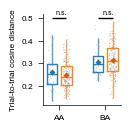

In [56]:
from catrace.visualize import PlotBoxplotParams, PlotBoxplotMultiOdorCondParams
from catrace.cross_trial import process_and_plot_cross_trial_similarity
params = PlotBoxplotMultiOdorCondParams
odor_keys = ['aa', 'ba'] # stimuli
odor_keys = [f'odors_{key}' for key in odor_keys]

from catrace.for_paper import (save_figure_for_paper, save_stats_json)

dataset_name = 'juvenile'

params = PlotBoxplotMultiOdorCondParams(
        figsize=(2.2, 1.42),
        label_fontsize=6,
        legend_fontsize=5,
        show_ns=True,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.05,
        box_linewidth=1,
        strip_alpha=0.8,
        strip_size=0.5,
        pvalue_bar_linewidth=1,
        pvalue_marker_fontsize=5,
)

fig, test_results, multi_df = process_and_plot_cross_trial_similarity(cross_trial_dff, dp_dsconfig, odor_keys, region='Dp', params=params)
ax = fig.get_axes()[0]
ax = fig.get_axes()[0]
# ax.set_ylim((0, 0.68))
ylabel = ax.get_ylabel()
if ylabel=='cosine':
    new_ylabel = 'Trial-to-trial cosine distance'
elif ylabel=='pattern_correlation':
    new_ylabel = 'Trial-to-trial pattern correlation'
else:
    new_ylabel = ylabel
ax.set_ylabel(new_ylabel, fontsize=6)
# Remove legend
if ax.get_legend() is not None:
     ax.get_legend().remove()

xlabel_dict = {'odors_aa': 'AA', 'odors_ba': 'BA'}
xlabels = ax.get_xticklabels()
new_xlabels = [xlabel_dict[label.get_text()] for label in xlabels]
ax.set_xticklabels(new_xlabels)

fig_name = fig_name = f'{dataset_name}_trained_cross_trial_similarity'
save_figure_for_paper(fig, fig_name, fig_dir)
save_stats_json(test_results, fig_name, fig_dir, tuple_key_to_str=True)

In [57]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
sentence = sentence.replace('odors_aa', 'amino acids').replace('odors_ba', 'bile acids')
print(sentence)

For amino acids, Comparing naive (mean = 0.262 ± 0.0687, n = 54) vs trained (mean = 0.250 ± 0.0602, n = 225): Mann–Whitney U test, U = 6637.00, P = 0.292. For bile acids, Comparing naive (mean = 0.31 ± 0.0582, n = 54) vs trained (mean = 0.32 ± 0.0668, n = 225): Mann–Whitney U test, U = 5327.00, P = 0.160.
